<a href="https://colab.research.google.com/github/olkaand/uczenie_maszynowe/blob/use_case1/Case1dom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Pakiety**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,  MaxAbsScaler
import numpy as np
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


##**Dane**

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving case1.csv to case1 (1).csv


### **Wczytanie i wyświetlenie danych**

In [4]:
df = pd.read_csv('case1.csv', sep=';', on_bad_lines='skip')
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [6]:
df.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [7]:
liczba_wierszy = df.shape[0]

# Wyświetlenie liczby wierszy
print("Liczba wierszy w całym pliku:", liczba_wierszy)

Liczba wierszy w całym pliku: 9841


### **Sprawdzenie pustych wartości**

In [8]:
# Sprawdzenie, czy są puste wartości w ramce danych
empty = df.isna()

# Obliczenie liczby pustych wartości w każdej kolumnie
empty_sum = empty.sum()

# Wyświetlenie liczby pustych wartości w poszczególnych kolumnach
print(empty_sum)

Unnamed: 0                                                0
Index                                                     0
Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                            

In [9]:
# Obliczenie procentowego udziału brakujących danych w każdej kolumnie
procent_brakujacych = (df.isna().mean()) * 100

# Wyświetlenie procentowego udziału brakujących danych
print("Procentowy udział brakujących danych w poszczególnych kolumnach:")
#print(procent_brakujacych.round(2), '%%')

for column_name, value in procent_brakujacych.items():
    print("'{}': {:.2f}%".format(column_name, value))


Procentowy udział brakujących danych w poszczególnych kolumnach:
'Unnamed: 0': 0.00%
'Index': 0.00%
'Address': 0.00%
'FLAG': 0.00%
'Avg min between sent tnx': 0.00%
'Avg min between received tnx': 0.00%
'Time Diff between first and last (Mins)': 0.00%
'Sent tnx': 0.00%
'Received Tnx': 0.00%
'Number of Created Contracts': 0.00%
'Unique Received From Addresses': 0.00%
'Unique Sent To Addresses': 0.00%
'min value received': 0.00%
'max value received ': 0.00%
'avg val received': 0.00%
'min val sent': 0.00%
'max val sent': 0.00%
'avg val sent': 0.00%
'min value sent to contract': 0.00%
'max val sent to contract': 0.00%
'avg value sent to contract': 0.00%
'total transactions (including tnx to create contract': 0.00%
'total Ether sent': 0.00%
'total ether received': 0.00%
'total ether sent contracts': 0.00%
'total ether balance': 0.00%
'Total ERC20 tnxs': 8.42%
'ERC20 total Ether received': 8.42%
'ERC20 total ether sent': 8.42%
'ERC20 total Ether sent contract': 8.42%
'ERC20 uniq sent addr': 

Poziom wartości pustych wynosi ~8% na zmienne gdzie występują wartości puste, w części zmiennych nie występują wartości puste

### Histogram

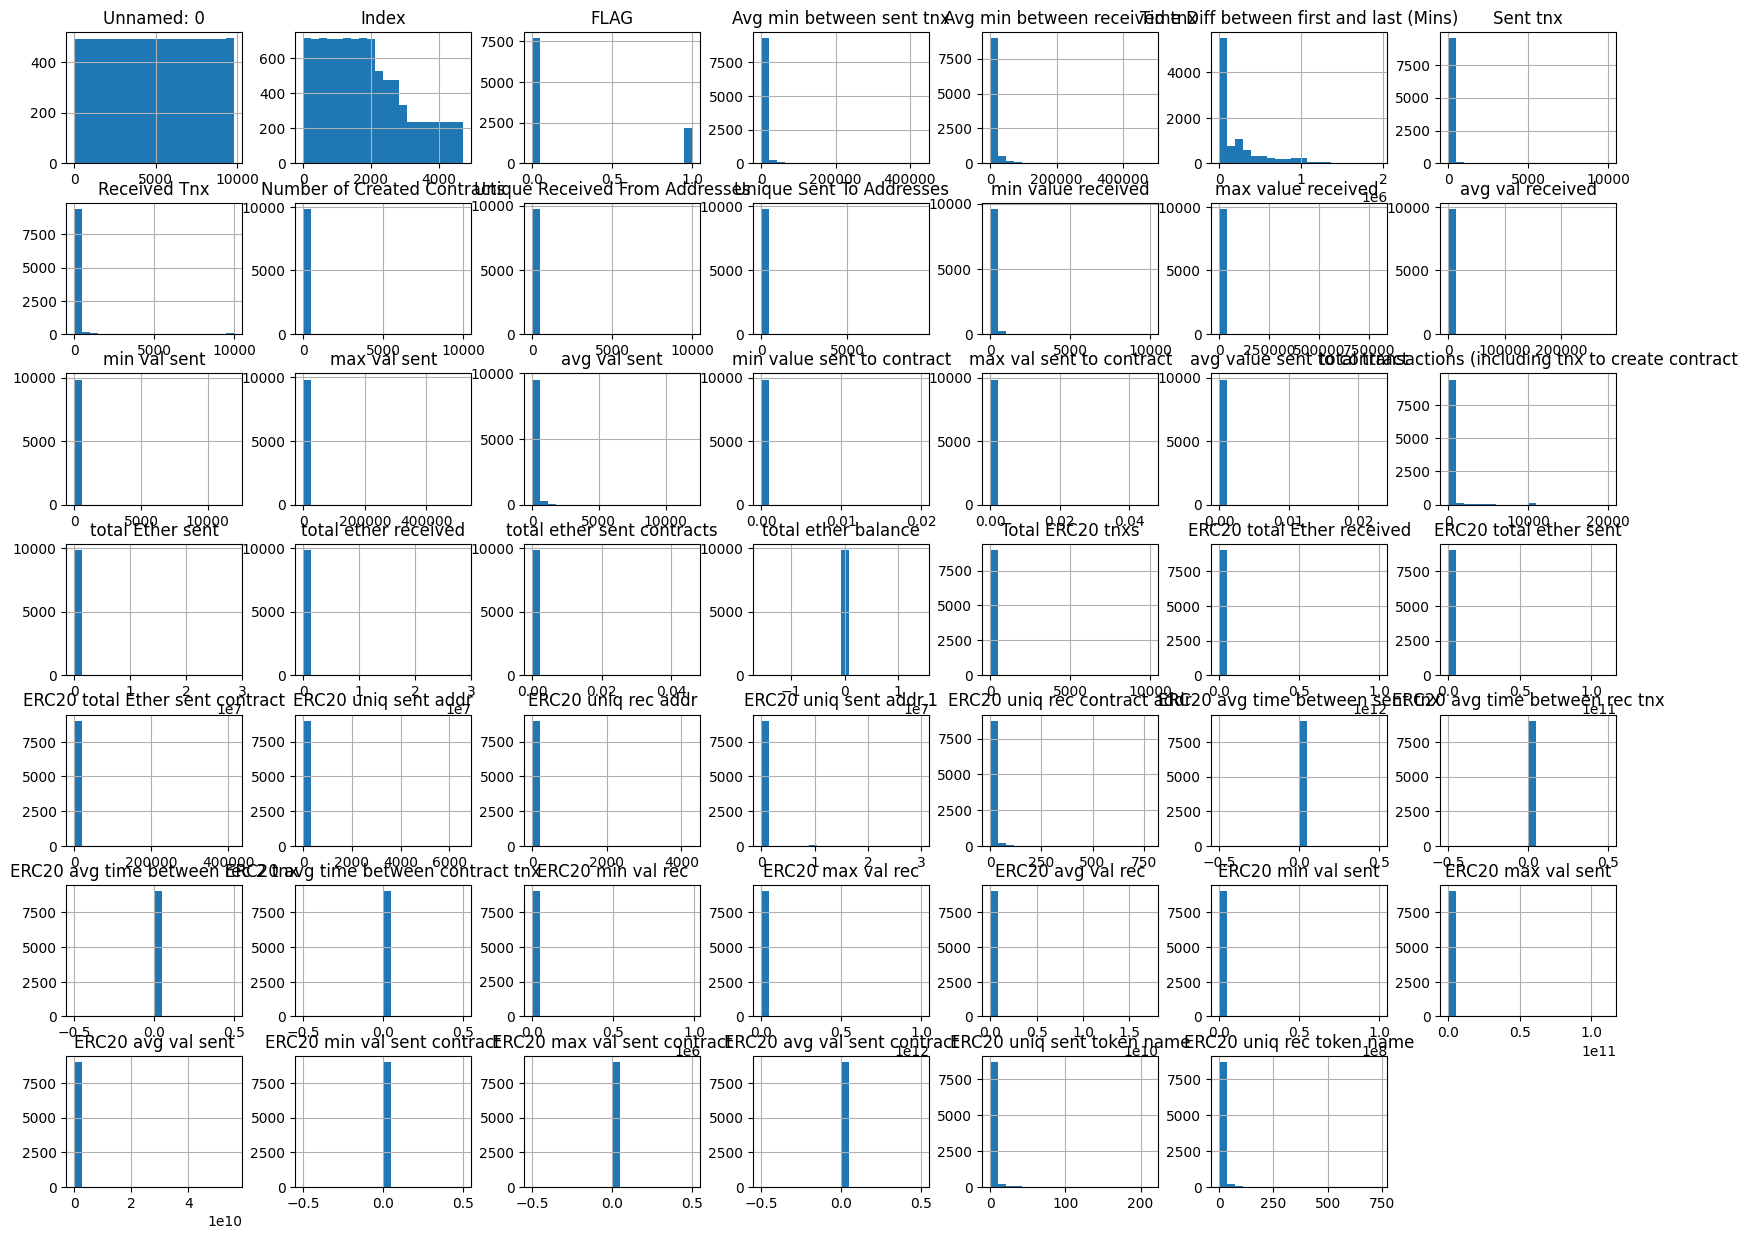

In [10]:
df.hist(bins = 20, figsize = (20, 15))
plt.show()

### Usunięcie zmiennych adres, unnamed i index


In [11]:
df = df.drop(['Address', 'Unnamed: 0', 'Index'], axis=1)
df.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [12]:
df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


### **Sprawdzenie wartości odstających**

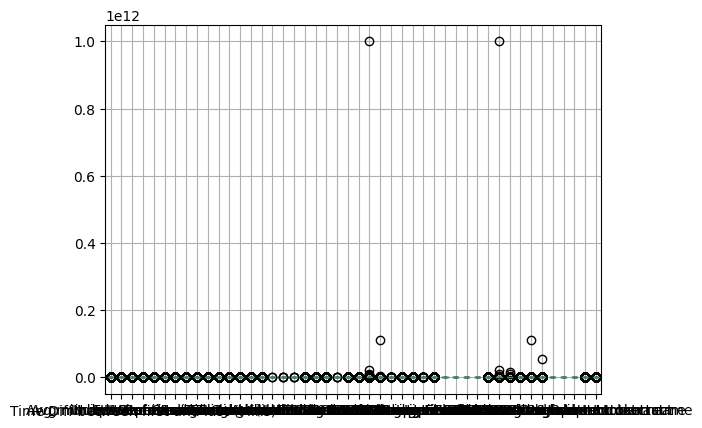

In [13]:
df.boxplot()
plt.show()

#### Wykresy pudełkowe dla zmiennych

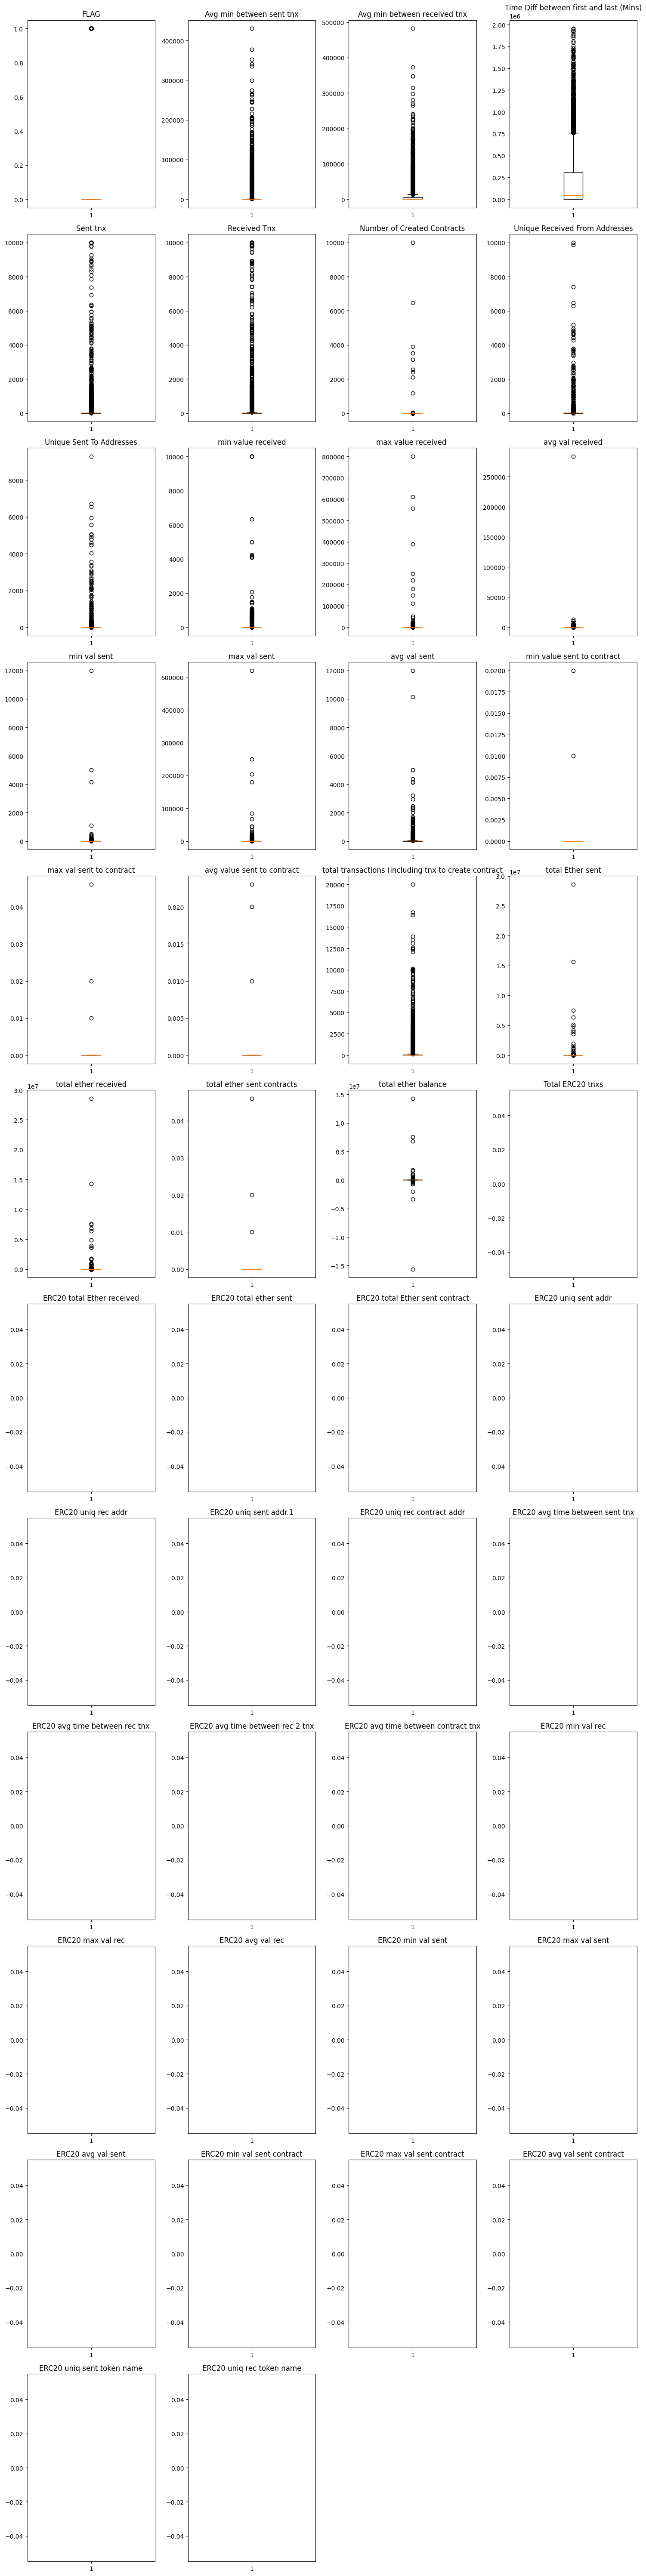

In [14]:
# ile kolumn w rzędzie
num_cols = 4

num_rows = (len(df.columns) + num_cols - 1) // num_cols

# wysokość podwykresu
subplot_height = 5

# Oblicz wysokość całej figury
figure_height = subplot_height * num_rows

plt.figure(figsize=(15, figure_height))

for i, column in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.subplot(num_rows, num_cols, i + 1)

        # Wykres pudełkowy z zaznaczonymi wartościami odstającymi
        plt.boxplot(df[column], showfliers=True)

        plt.title(column)

plt.tight_layout()
plt.show()

## Przygotowanie danych

### Korelacja

In [15]:
# Obliczenie korelacji między wszystkimi zmiennymi
korelacja = df.corr()

# Wyświetlenie macierzy korelacji
korelacja.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
FLAG,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.031941,-0.045584,-0.021641,...,-0.004313,0.007881,0.025364,0.025038,0.025044,NaN,NaN,NaN,0.009249,-0.018047
Avg min between sent tnx,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.015912,-0.017688,-0.014886,...,-0.002456,-0.003149,-0.001687,-0.002020,-0.001965,NaN,NaN,NaN,0.000529,0.047202
Avg min between received tnx,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.029571,-0.025747,-0.045753,...,-0.003544,-0.005606,-0.003758,-0.003780,-0.003727,NaN,NaN,NaN,-0.019896,-0.014966
Time Diff between first and last (Mins),-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,0.037043,0.071140,-0.084996,...,0.046512,0.049020,-0.006852,-0.006268,-0.006802,NaN,NaN,NaN,0.263939,0.324288
Sent tnx,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.130064,0.670014,0.024015,...,0.004291,0.008843,-0.001557,-0.001019,-0.001415,NaN,NaN,NaN,0.079728,0.220614


Występują wartości NaN, tam nie ma informacji o korelacji, kolumna FLAG nie jest mocno skorelowana z resztą zmiennych.

### Usunięcie wartości pustych

In [16]:
df = df.dropna()
df.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


#### Wykres pudełkowy po usunięciu wartości pustych

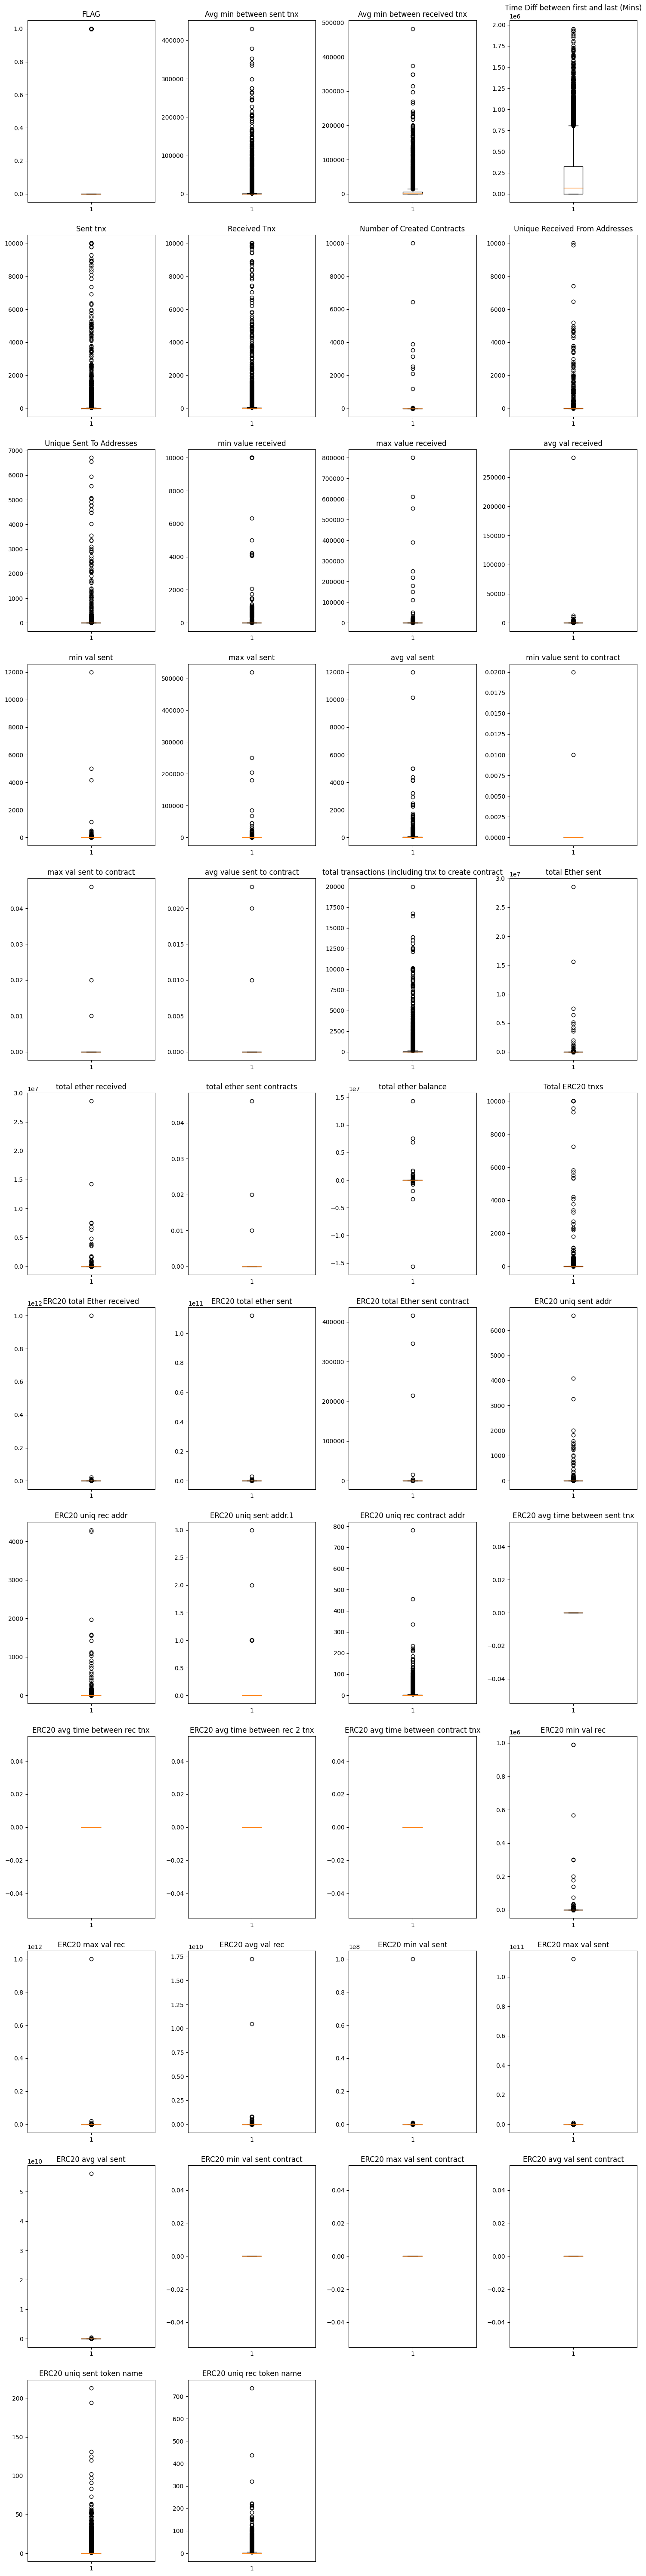

In [17]:
# ile kolumn w rzędzie
num_cols = 4

num_rows = (len(df.columns) + num_cols - 1) // num_cols

# wysokość podwykresu
subplot_height = 5

# Oblicz wysokość całej figury
figure_height = subplot_height * num_rows

plt.figure(figsize=(15, figure_height))

for i, column in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.subplot(num_rows, num_cols, i + 1)

        # Wykres pudełkowy z zaznaczonymi wartościami odstającymi
        plt.boxplot(df[column], showfliers=True)

        plt.title(column)

plt.tight_layout()
plt.show()

Wciąż występuje wiele wartości odstających

### Korelacja po usunięciu wartości pustych

In [18]:
# Obliczenie korelacji między wszystkimi zmiennymi
korelacja = df.corr()

# Wyświetlenie macierzy korelacji
korelacja.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
FLAG,1.000000,-0.003726,-0.115733,-0.212092,-0.062756,-0.061546,-0.011454,-0.019920,-0.036138,-0.002393,...,-0.004325,0.007903,0.025356,0.025030,0.025036,NaN,NaN,NaN,0.009170,-0.017853
Avg min between sent tnx,-0.003726,1.000000,0.060019,0.209021,-0.034588,-0.038079,-0.006624,-0.016769,-0.019458,-0.020167,...,-0.002451,-0.003119,-0.001685,-0.002019,-0.001964,NaN,NaN,NaN,0.000369,0.047261
Avg min between received tnx,-0.115733,0.060019,1.000000,0.294836,-0.043024,-0.056302,-0.008993,-0.030749,-0.027993,-0.048796,...,-0.003559,-0.005604,-0.003781,-0.003804,-0.003751,NaN,NaN,NaN,-0.020572,-0.016290
Time Diff between first and last (Mins),-0.212092,0.209021,0.294836,1.000000,0.154031,0.144275,-0.005254,0.032715,0.074880,-0.094729,...,0.046662,0.048931,-0.006846,-0.006261,-0.006797,NaN,NaN,NaN,0.264861,0.324676
Sent tnx,-0.062756,-0.034588,-0.043024,0.154031,1.000000,0.199842,0.330068,0.132938,0.683190,0.024123,...,0.004475,0.009174,-0.001543,-0.000989,-0.001399,NaN,NaN,NaN,0.082596,0.225792


Sprawdzałam ilość par skorelowanych na poziomie mniejszym niż 1% i było ich na tyle dużo, że postanowiłam nie usuwać tych kolumn

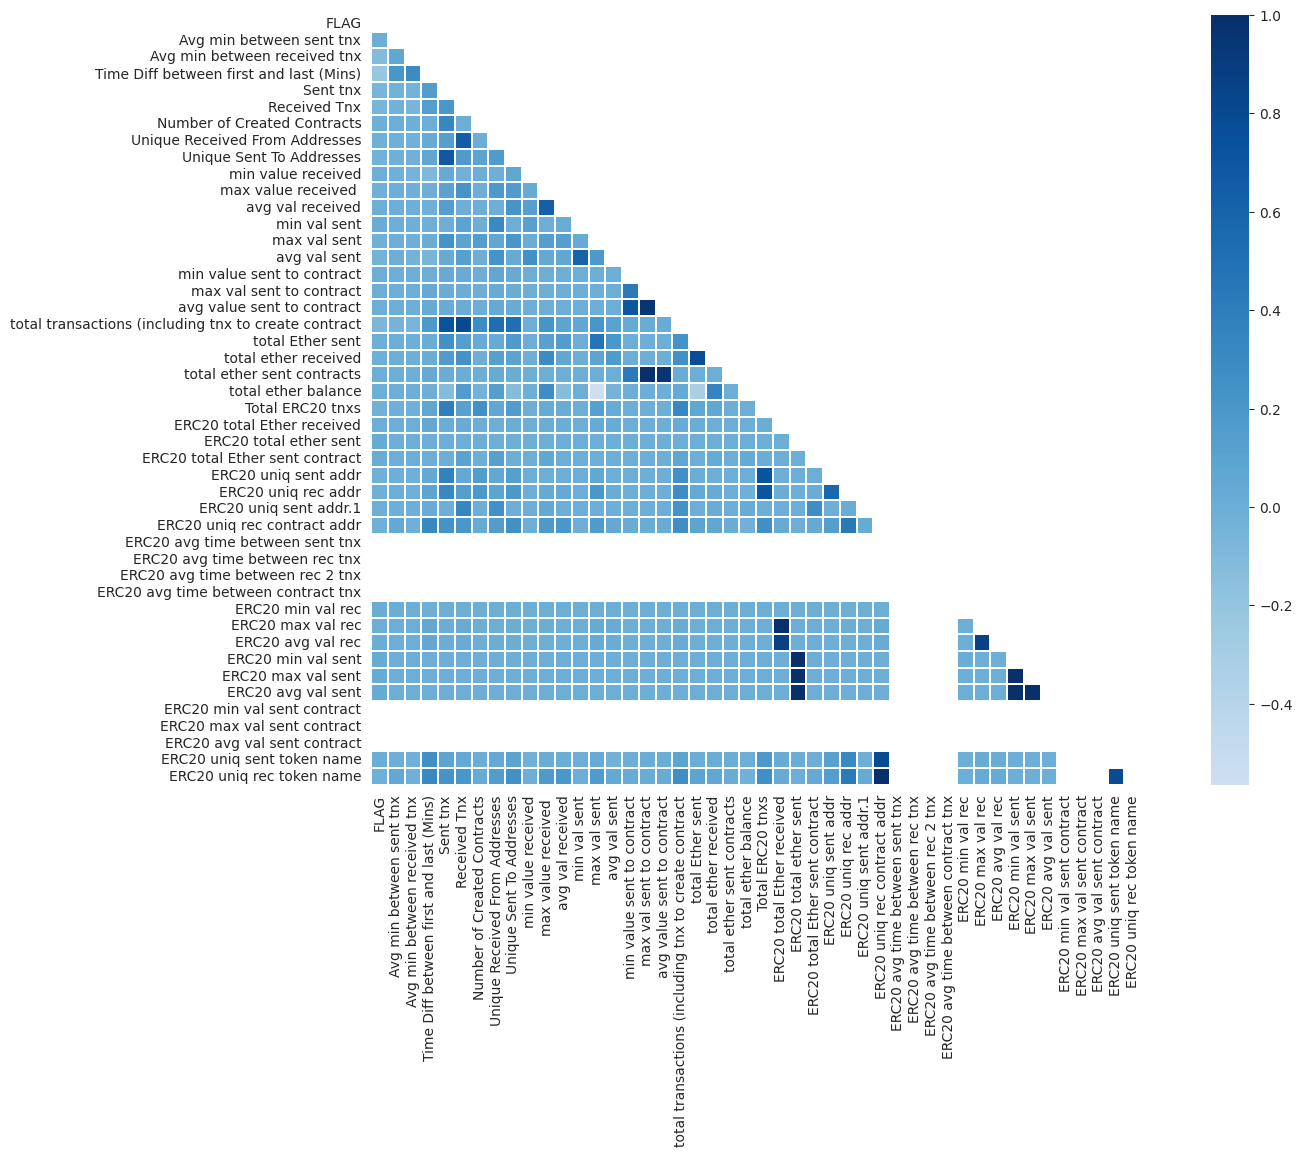

In [19]:
# korelacja zmiennych między sobą
numeric_columns = df.select_dtypes(include=['number'])
corr = numeric_columns.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='Blues', center=0, linewidths=0.1, square=True)

In [20]:
df.head()


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


## Przygotowanie do modeli

### Podział danych i ich końcowe opracowanie

In [21]:
y = df['FLAG']
X = df.drop(['FLAG'], axis=1)

In [22]:
y.value_counts()

0    7631
1    1350
Name: FLAG, dtype: int64

Za zmienną Y przyjmuje zmienną 01 FLAG mówiącą o tym czy doszło do oszustwa czy nie

### Zastąpienie wartości odstających

Próbowałam usunąć te wartości ale wyskakiwała niezliczona ilość NaN i znikały jedynki z kolumny FLAG

In [23]:
def remove_outliers_using_median(X_median):

    # obliczanie mediany
    median_values = X_median.iloc[:, :-2].median()

    # obliczanie granic rozstępu
    Q1 = X_median.iloc[:, :-2].quantile(0.25)
    Q3 = X_median.iloc[:, :-2].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # zastąpienie wartości odstających medianą dla każdej kolumny
    X_median_out = X_median.copy()
    for col in X_median.columns[:-2]:
        is_outlier = (X_median[col] < lower_bound[col]) | (X_median[col] > upper_bound[col])
        X_median_out.loc[is_outlier, col] = median_values[col]

    return X_median_out

X_median = remove_outliers_using_median(X)

In [24]:
X_median.shape[0]

8981

Dla zmiennych obiektowych

In [25]:
# przekształcenei zmiennych obliektowych na kategorie
categories = X_median.select_dtypes('O').columns.astype('category')
X_median[categories]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,None,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9832,,Blockwell say NOTSAFU
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com


In [26]:
#Zamiana pustych wierszy i uzupełnienie '0'
for column in ['ERC20 most sent token type', 'ERC20_most_rec_token_type']:
    X_median[column] = X_median[column].replace(['', ' '], '0')
    X_median[column].fillna('0', inplace=True)

In [27]:
# Uzupełnienie wartości w kolumnach nienumerycznych najczęściej występującą wartością
for column in ['ERC20 most sent token type', 'ERC20_most_rec_token_type']:
    if X_median[column].dtype == 'category':
        most_common_value = X_median[column].mode()[0]
        X_median[column].fillna(most_common_value, inplace=True)

### Sprawdzam czy teraz już nie mam żadnych braków

In [28]:
# Obliczenie procentowego udziału brakujących danych w każdej kolumnie
procent_brakujacych = (df.isna().mean()) * 100

# Wyświetlenie procentowego udziału brakujących danych
print("Procentowy udział brakujących danych w poszczególnych kolumnach:")
#print(procent_brakujacych.round(2), '%%')

for column_name, value in procent_brakujacych.items():
    print("'{}': {:.2f}%".format(column_name, value))


Procentowy udział brakujących danych w poszczególnych kolumnach:
'FLAG': 0.00%
'Avg min between sent tnx': 0.00%
'Avg min between received tnx': 0.00%
'Time Diff between first and last (Mins)': 0.00%
'Sent tnx': 0.00%
'Received Tnx': 0.00%
'Number of Created Contracts': 0.00%
'Unique Received From Addresses': 0.00%
'Unique Sent To Addresses': 0.00%
'min value received': 0.00%
'max value received ': 0.00%
'avg val received': 0.00%
'min val sent': 0.00%
'max val sent': 0.00%
'avg val sent': 0.00%
'min value sent to contract': 0.00%
'max val sent to contract': 0.00%
'avg value sent to contract': 0.00%
'total transactions (including tnx to create contract': 0.00%
'total Ether sent': 0.00%
'total ether received': 0.00%
'total ether sent contracts': 0.00%
'total ether balance': 0.00%
'Total ERC20 tnxs': 0.00%
'ERC20 total Ether received': 0.00%
'ERC20 total ether sent': 0.00%
'ERC20 total Ether sent contract': 0.00%
'ERC20 uniq sent addr': 0.00%
'ERC20 uniq rec addr': 0.00%
'ERC20 uniq sent 

### Standaryzacja

In [29]:
# Tworzenie listy kolumn, które są typu int64 lub float64
col_float = [col for col in X_median.columns if X_median[col].dtype in ['int64', 'float64']]

# Tworzenie nowej zmiennej zawierającej wybrane kolumny
col_float_df = X_median[col_float]

scaler = MinMaxScaler()
for i in X_median[col_float]:
  X_median[i] = scaler.fit_transform(X_median[[i]])
X_median.head()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0.457653,0.074669,0.873758,0.096774,0.069444,0.0,0.181818,0.333333,0.000000,0.234858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,Cofoundit,Numeraire
1,0.011660,0.201976,0.085605,0.096774,0.111111,0.0,0.454545,0.333333,0.000000,0.013399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,Livepeer Token,Livepeer Token
2,0.011660,0.166173,0.640615,0.064516,0.138889,0.0,0.909091,0.333333,0.014401,0.005975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,None,XENON
3,0.011660,0.051444,0.492870,0.806452,0.125000,0.0,0.636364,0.333333,0.000000,0.042863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,Raiden,XENON
4,0.019845,0.731032,0.474170,0.096774,0.277778,0.0,0.636364,0.333333,0.000000,0.065640,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,StatusNetwork,EOS


### Podział zbioru

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_median, y, test_size=0.33, random_state=42)


In [31]:
y_train.value_counts()

0    5119
1     898
Name: FLAG, dtype: int64

Pipeline

In [32]:
columns_to_encode = ['ERC20 most sent token type', 'ERC20_most_rec_token_type']

onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# przkształcenie nienumerycznych kolumn
column_transformer = ColumnTransformer([
    ('onehot', onehot_encoder, columns_to_encode)],
    remainder='passthrough'
)


over = SMOTE(sampling_strategy='minority') # 'minority' próbkowanie mniejszościowej klasy do równosci z większościową
under = RandomUnderSampler(sampling_strategy='majority') # 'majority' większościowa klasa równa mniejszościowej
pca = PCA(svd_solver='arpack')

## Modele

### KNN (K-Nearest Neighbors -> K-najbliższych sąsiadów)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2512
           1       0.78      0.98      0.87       452

    accuracy                           0.96      2964
   macro avg       0.89      0.97      0.92      2964
weighted avg       0.96      0.96      0.96      2964

ROC-AUC Score: 0.9653627191251902


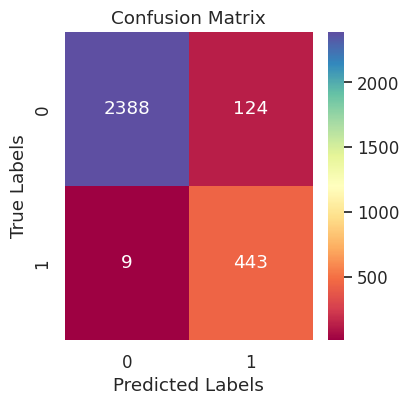

Accuracy 0.9551282051282052
Precision 0.781305114638448
Recall 0.9800884955752213


In [33]:
model_knn = KNeighborsClassifier(n_neighbors=3)

knn_pipeline = make_pipeline(column_transformer, scaler, over, under, pca, model_knn)

knn_pipeline.fit(X_train, y_train)

y_pred = knn_pipeline.predict(X_test)

# Ewaluacja modelu
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm,  cmap = 'Spectral',  annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
print("Accuracy", accuracy_knn)
print("Precision", precision_knn)
print("Recall", recall_knn)

# Cross-validation
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
#scores = cross_val_score(knn_pipeline, X_median, y, scoring='roc_auc', cv=cv, n_jobs=-1)
#print("Cross-Validation ROC-AUC Score:", scores.mean())

### Regresja logistyczna dwa modele

Model z domyślnymi wagami

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2512
           1       0.89      0.94      0.92       452

    accuracy                           0.97      2964
   macro avg       0.94      0.96      0.95      2964
weighted avg       0.97      0.97      0.97      2964

ROC-AUC Score: 0.9599814694774815


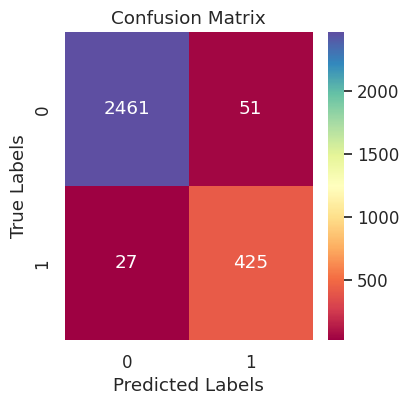

Accuracy 0.9736842105263158
Precision 0.8928571428571429
Recall 0.9402654867256637


In [34]:
model_lr = LogisticRegression()

lr_pipeline = make_pipeline(column_transformer, scaler, over, under, pca, model_lr)

lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

# Ewaluacja modelu
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm,  cmap = 'Spectral',  annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
print("Accuracy", accuracy_lr)
print("Precision", precision_lr)
print("Recall", recall_lr)



Model z innymi wagami

In [35]:
weights= {0:0.67,1:0.33}
model_lr2= LogisticRegression(solver='lbfgs',class_weight=weights)

Większą wagę dałam do "0", ponieważ bardziej chciałabym aby nie wystąpiło oszustwo

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2512
           1       0.93      0.92      0.93       452

    accuracy                           0.98      2964
   macro avg       0.96      0.96      0.96      2964
weighted avg       0.98      0.98      0.98      2964

ROC-AUC Score: 0.9562189983653683


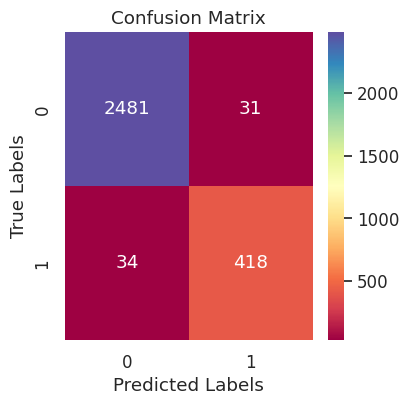

Accuracy 0.9780701754385965
Precision 0.9309576837416481
Recall 0.9247787610619469


In [36]:
lr2_pipeline = make_pipeline(column_transformer, scaler, over, under, pca, model_lr2)

lr2_pipeline.fit(X_train, y_train)
y_pred = lr2_pipeline.predict(X_test)

# Ewaluacja modelu
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm,  cmap = 'Spectral',  annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

accuracy_lr2 = accuracy_score(y_test, y_pred)
precision_lr2 = precision_score(y_test, y_pred)
recall_lr2 = recall_score(y_test, y_pred)
print("Accuracy", accuracy_lr2)
print("Precision", precision_lr2)
print("Recall", recall_lr2)


### Support Vector Machines (SVM)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2512
           1       0.97      0.94      0.96       452

    accuracy                           0.99      2964
   macro avg       0.98      0.97      0.97      2964
weighted avg       0.99      0.99      0.99      2964

ROC-AUC Score: 0.9688504030212501


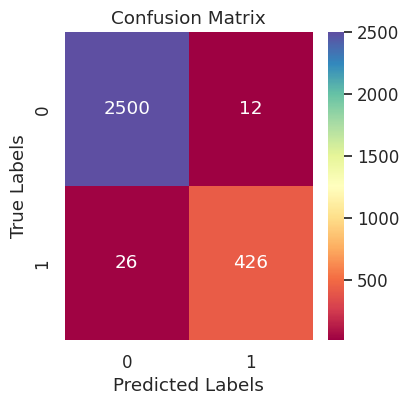

Accuracy 0.9871794871794872
Precision 0.9726027397260274
Recall 0.9424778761061947


In [37]:
model_svm = SVC()  # Możesz dostosować parametry SVC według potrzeb

# Tworzenie potoku dla SVM
svm_pipeline = make_pipeline(column_transformer, scaler, over, under, pca, model_svm)

# Trenowanie modelu
svm_pipeline.fit(X_train, y_train)

# Przewidywanie na danych testowych
y_pred_svm = svm_pipeline.predict(X_test)

# Ewaluacja modelu
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_svm, cmap='Spectral', annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
print("Accuracy", accuracy_svm)
print("Precision", precision_svm)
print("Recall", recall_svm)


## Podsumowanie

In [38]:
print("KNN wyniki: ")
print("Accuracy", accuracy_knn)
print("Precision", precision_knn)
print("Recall", recall_knn)
print("")

print("REGRESJA LOGISTYCZNA wyniki: ")
print("Accuracy", accuracy_lr)
print("Precision", precision_lr)
print("Recall", recall_lr)
print("")

print("REGRESJA LOGISTYCZNA Z INNYMI WAGAMI wyniki: ")
print("Accuracy", accuracy_lr2)
print("Precision", precision_lr2)
print("Recall", recall_lr2)
print("")

print("SVM wyniki: ")
print("Accuracy", accuracy_svm)
print("Precision", precision_svm)
print("Recall", recall_svm)

KNN wyniki: 
Accuracy 0.9551282051282052
Precision 0.781305114638448
Recall 0.9800884955752213

REGRESJA LOGISTYCZNA wyniki: 
Accuracy 0.9736842105263158
Precision 0.8928571428571429
Recall 0.9402654867256637

REGRESJA LOGISTYCZNA Z INNYMI WAGAMI wyniki: 
Accuracy 0.9780701754385965
Precision 0.9309576837416481
Recall 0.9247787610619469

SVM wyniki: 
Accuracy 0.9871794871794872
Precision 0.9726027397260274
Recall 0.9424778761061947


In [39]:
# Tworzenie słownika, który przyporządkowuje nazwy zmiennych do ich wartości
variables = {'KNN': recall_knn, 'Regresja logistyczna z domyślnymi parametrami': recall_lr,
             'Regresja logistyczna z wagami 0:0.67 i 1:0.33': recall_lr2, 'SVM' :recall_svm}

# Znalezienie maksymalnej wartości i odpowiadającej nazwie zmiennej
max_variable, max_value = max(variables.items(), key=lambda x: x[1])

print("Model z maksymalną wartością recall:", max_variable)
print("Maksymalna wartość:", max_value)

Model z maksymalną wartością recall: KNN
Maksymalna wartość: 0.9800884955752213


Najwyższy recall uzyskano dla tak przygotowanych danych dla modelu KNN z domyślną ilością sąsiadów (3 sąsiadów). Nie miał on jednak najlepszej precyzji jeśli chodzi o odpowiednie dopasowanie danych.

Najlepszą precyzję uzyskałam dla regresji logistycznej ze swoimi wagami. Sprawdziłam również ten model w momencie gdy wagi dla 0 były widocznie niższe niż dla 1, co dało recall ~99% jednak zrezygnowałam z tego modelu w obawie o wykorzystanie przeuczonego modelu.

Biorąc natomiast pod uwagę stopień dopasowania i recall rozważałabym użycie modelu SVM.